In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('bike.csv'); train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
train.info() # 회귀분석을 위해서 datatime을 숫자로 바꿔야함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
train['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [5]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [7]:
train['datetime'].loc[5]

Timestamp('2011-01-01 05:00:00')

In [8]:
train['datetime'].loc[5].year

2011

In [9]:
train['datetime'].loc[5].month

1

In [10]:
train['datetime'].loc[5].day

1

In [11]:
train['datetime'].loc[5].hour

5

In [12]:
train['datetime'].loc[5].minute

0

In [13]:
train['datetime'].loc[5].second

0

In [14]:
train['datetime'].dt.year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [15]:
type(train['datetime'].dt)

pandas.core.indexes.accessors.DatetimeProperties

In [16]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek

In [17]:
train.drop(['datetime'], axis=1, inplace = True)

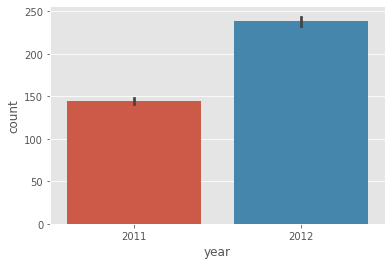

In [19]:
plt.style.use('ggplot')
sns.barplot(data = train, x = 'year', y = 'count')

In [20]:
train['day'].value_counts()

1     575
9     575
5     575
17    575
15    574
19    574
16    574
7     574
8     574
4     574
13    574
14    574
3     573
2     573
12    573
10    572
6     572
11    568
18    563
Name: day, dtype: int64

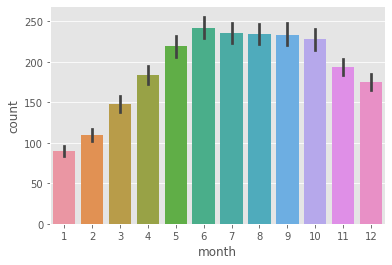

In [21]:
plt.style.use('ggplot')
sns.barplot(data = train, x = 'month', y = 'count')

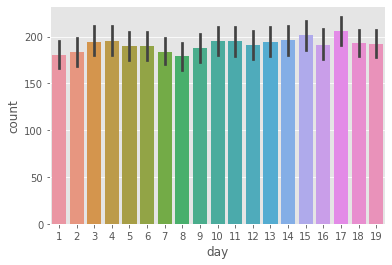

In [22]:
plt.style.use('ggplot')
sns.barplot(data = train, x = 'day', y = 'count')

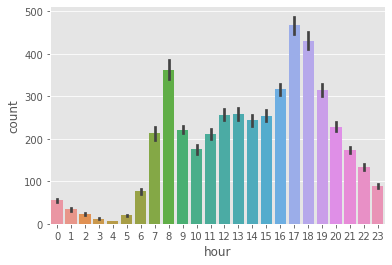

In [23]:
plt.style.use('ggplot')
sns.barplot(data = train, x = 'hour', y = 'count')

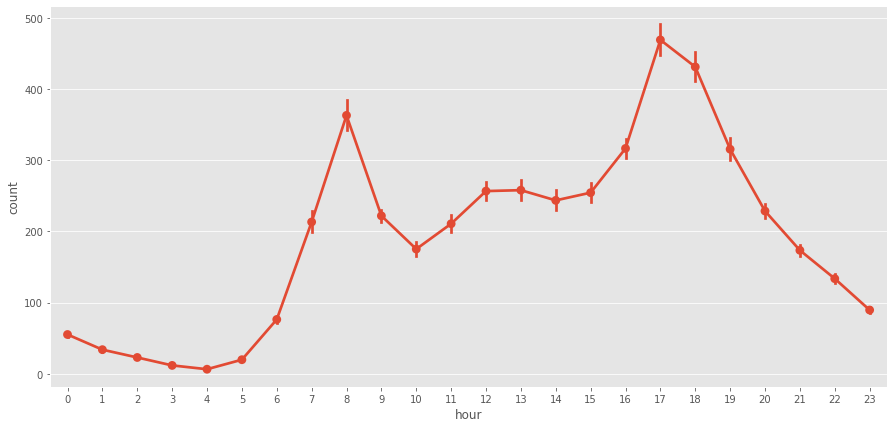

In [24]:
plt.style.use('ggplot')
plt.figure(figsize = (15, 7))
sns.pointplot(data = train, x = 'hour', y = 'count')

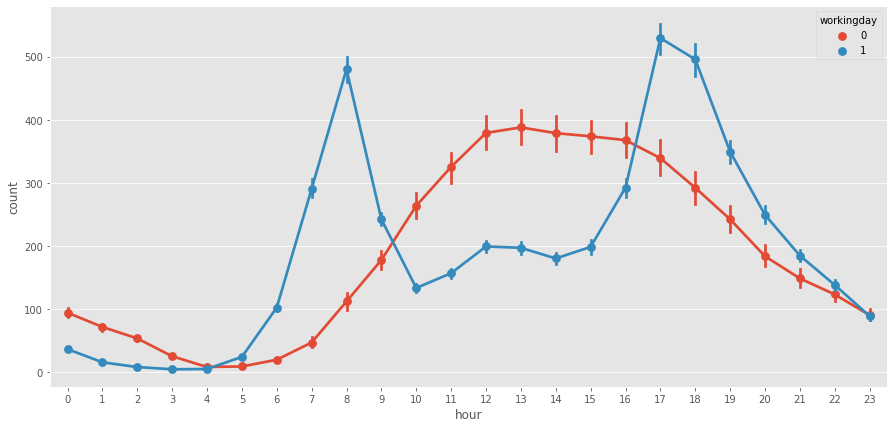

In [25]:
plt.style.use('ggplot')
plt.figure(figsize = (15, 7))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday')

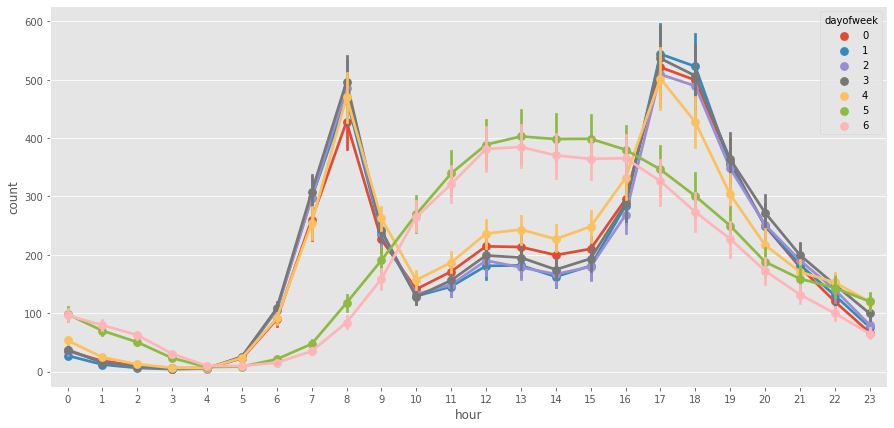

In [26]:
plt.style.use('ggplot')
plt.figure(figsize = (15, 7))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek')

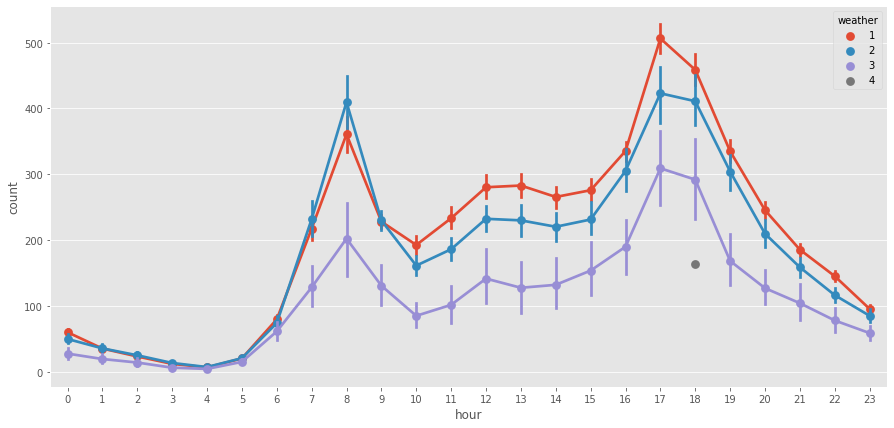

In [27]:
plt.style.use('ggplot')
plt.figure(figsize = (15, 7))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weather')

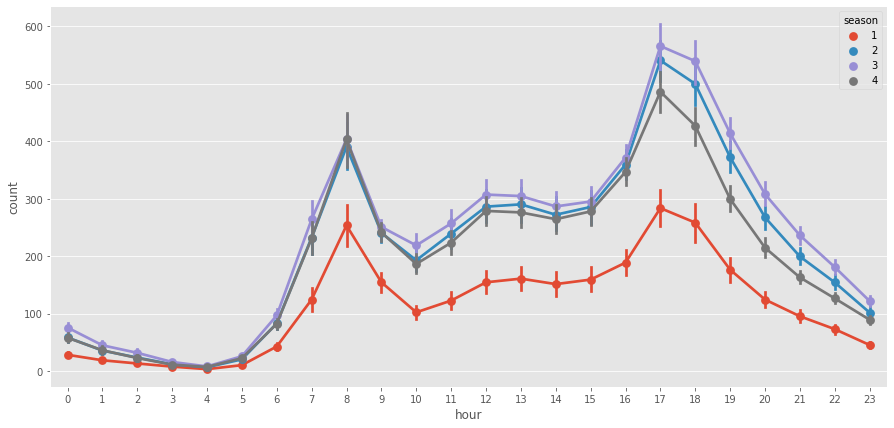

In [28]:
plt.style.use('ggplot')
plt.figure(figsize = (15, 7))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'season')

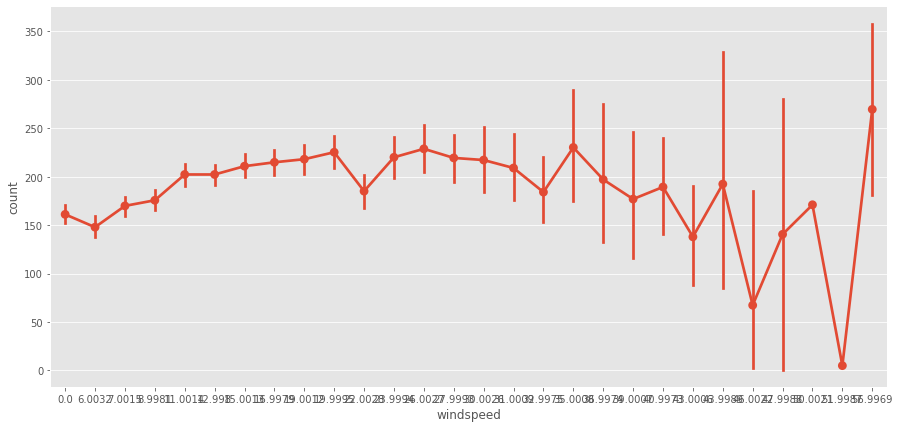

In [29]:
plt.style.use('ggplot')
plt.figure(figsize = (15, 7))
sns.pointplot(data = train, x = 'windspeed', y = 'count')

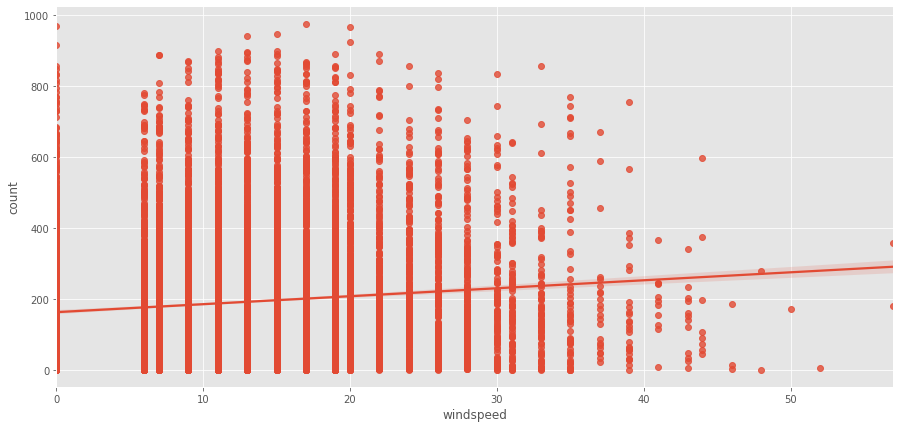

In [30]:
plt.style.use('ggplot')
plt.figure(figsize = (15, 7))
sns.regplot(data = train, x = 'windspeed', y = 'count')

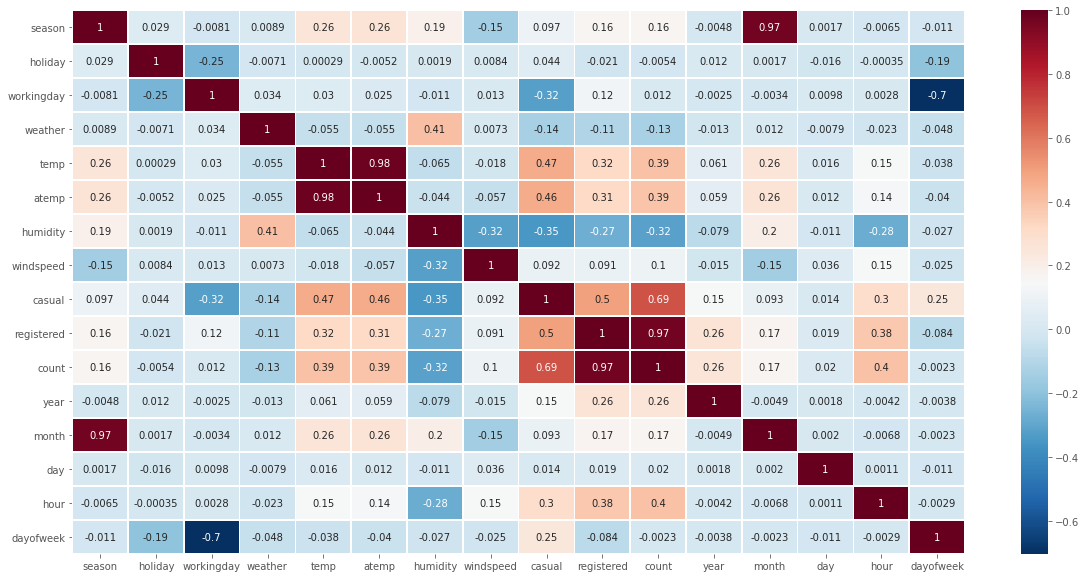

In [31]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(train.corr(), annot=True, cmap='RdBu_r', linewidths= 0.5)

In [32]:
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2


In [33]:
train.corr()['temp'] # 다중공선성 검사 꼭하기(유의미한 결과는 10초과)

season        0.258689
holiday       0.000295
workingday    0.029966
weather      -0.055035
temp          1.000000
atemp         0.984948
humidity     -0.064949
windspeed    -0.017852
casual        0.467097
registered    0.318571
count         0.394454
year          0.061226
month         0.257589
day           0.015551
hour          0.145430
dayofweek    -0.038466
Name: temp, dtype: float64

# 아무 전처리 없이 예측

In [34]:
X = train.copy()
y = train['count']

In [35]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2


In [36]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [37]:
X.pop('count')

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [38]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,2012,12,19,22,2


In [39]:
# 얘네 두개가 있으면 안됨
X.pop('registered')
X.pop('casual')

0         3
1         8
2         5
3         3
4         0
         ..
10881     7
10882    10
10883     4
10884    12
10885     4
Name: casual, Length: 10886, dtype: int64

In [40]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,19,22,2


In [41]:
X.pop('day') # day는 지우는 이유가 train 파일에는 1~19일 밖에 없고 나머지 20~말일까지는 test에 있음 즉, 1~19로만 학습을 하면 20~말일은 제대로 못함

0         1
1         1
2         1
3         1
4         1
         ..
10881    19
10882    19
10883    19
10884    19
10885    19
Name: day, Length: 10886, dtype: int64

In [42]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,22,2


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size = 0.2, random_state = 156)

In [44]:
from sklearn.linear_model import LinearRegression
lModel = LinearRegression()

In [45]:
lModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
pred = lModel.predict(X_train)

In [47]:
lModel.score(X_train, y_train) # R_square

0.3808472999618411

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
mean_squared_error(y_train, pred)**0.5

143.00375924493244

# 이상치제거

In [52]:
q1 = np.percentile(train['count'], 25)

In [53]:
q3 = np.percentile(train['count'], 75)

In [54]:
IQR = q3 - q1

In [55]:
trainWithoutOutliers = train[(train['count']>=q1 - (1.5*IQR)) & (train['count']<=(q3+1.5*IQR))]; trainWithoutOutliers

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2


In [57]:
trainOutliers = train[(train['count'] < (q1 - 1.5 * IQR)) | (train['count'] > (q3 + 1.5 * IQR))]; trainOutliers

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
6611,1,0,1,2,24.60,31.060,43,12.9980,89,623,712,2012,3,12,18,0
6634,1,0,1,1,28.70,31.820,37,7.0015,62,614,676,2012,3,13,17,1
6635,1,0,1,1,28.70,31.820,34,19.9995,96,638,734,2012,3,13,18,1
6649,1,0,1,1,18.04,21.970,82,0.0000,34,628,662,2012,3,14,8,2
6658,1,0,1,1,28.70,31.820,28,6.0032,140,642,782,2012,3,14,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4,0,1,2,13.94,15.150,61,19.9995,16,708,724,2012,12,11,8,1
10702,4,0,1,2,10.66,12.880,65,11.0014,18,670,688,2012,12,12,8,2
10726,4,0,1,1,9.84,11.365,60,12.9980,24,655,679,2012,12,13,8,3
10846,4,0,1,1,15.58,19.695,94,0.0000,10,652,662,2012,12,18,8,1


In [58]:
train = trainWithoutOutliers.copy()

In [59]:
train.index = range(len(train))

# 데이터 정규화

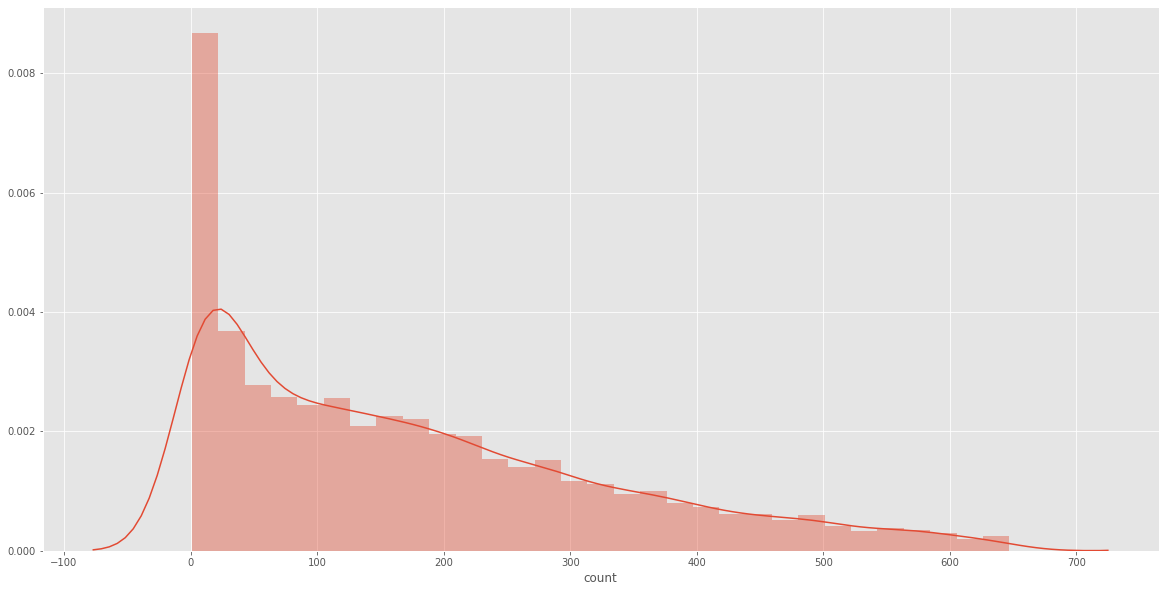

In [63]:
plt.style.use('ggplot')
plt.figure(figsize = (20, 10))
sns.distplot(train['count'])

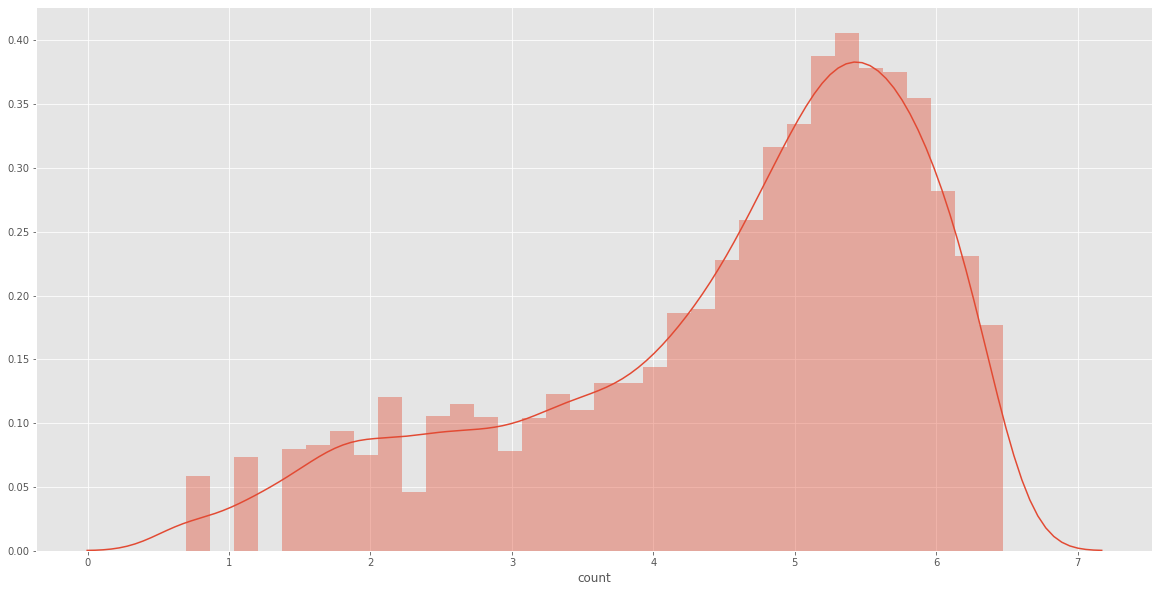

In [64]:
train['count'] = np.log1p(train['count'])
plt.figure(figsize = (20, 10))
sns.distplot(train['count'])

In [65]:
y = train['count']
y.head()

0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

In [66]:
X = train

In [69]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,3,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,8,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,5,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,0,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,4,0,1,1,15.58,19.695,50,26.0027,7,2012,12,19,2
10582,4,0,1,1,14.76,17.425,57,15.0013,10,2012,12,20,2
10583,4,0,1,1,13.94,15.910,61,15.0013,4,2012,12,21,2
10584,4,0,1,1,13.94,17.425,61,6.0032,12,2012,12,22,2


In [71]:
X.pop('count')
X.pop('registered')
X.pop('day')
X.pop('casual')

In [72]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10581,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,2
10582,4,0,1,1,14.76,17.425,57,15.0013,2012,12,20,2
10583,4,0,1,1,13.94,15.910,61,15.0013,2012,12,21,2
10584,4,0,1,1,13.94,17.425,61,6.0032,2012,12,22,2


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)

In [74]:
from sklearn.linear_model import LinearRegression
lModel = LinearRegression()
lModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
pred = lModel.predict(X_train)

In [76]:
lModel.score(X_train, y_train)

0.4743432028722757

In [77]:
from sklearn.metrics import mean_squared_error
print('MSE :',mean_squared_error(y_train, pred))

MSE : 1.0196284020589537


In [78]:
pred = lModel.predict(X_test)
print('MSE :', mean_squared_error(y_test, pred))

MSE : 0.9993991374857144


In [79]:
lModel.score(X_test, y_test)

0.500240815807653

# 결측치 처리

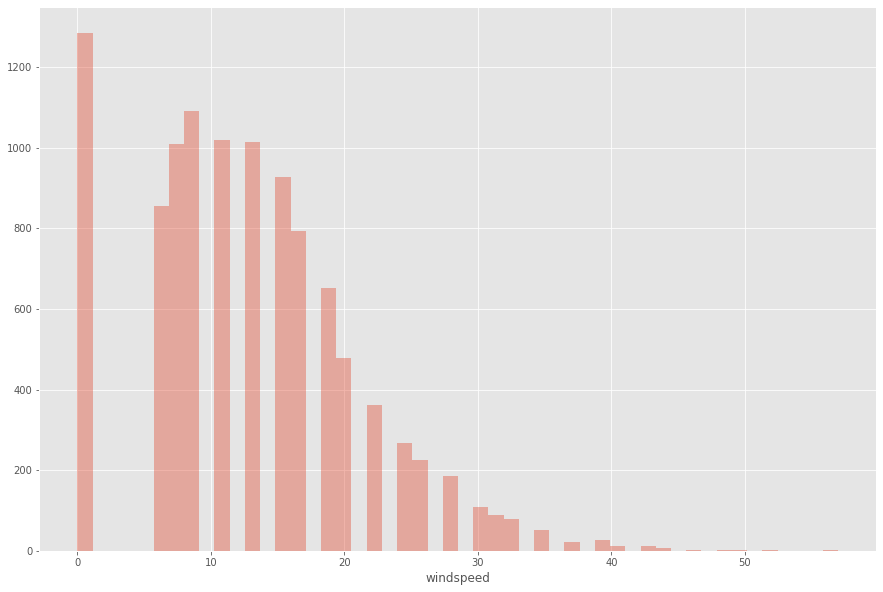

In [83]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
sns.distplot(train['windspeed'], kde = False) # kde = False하면 비율로 보여주는 것이 아니라 몇 개인지 알려줌

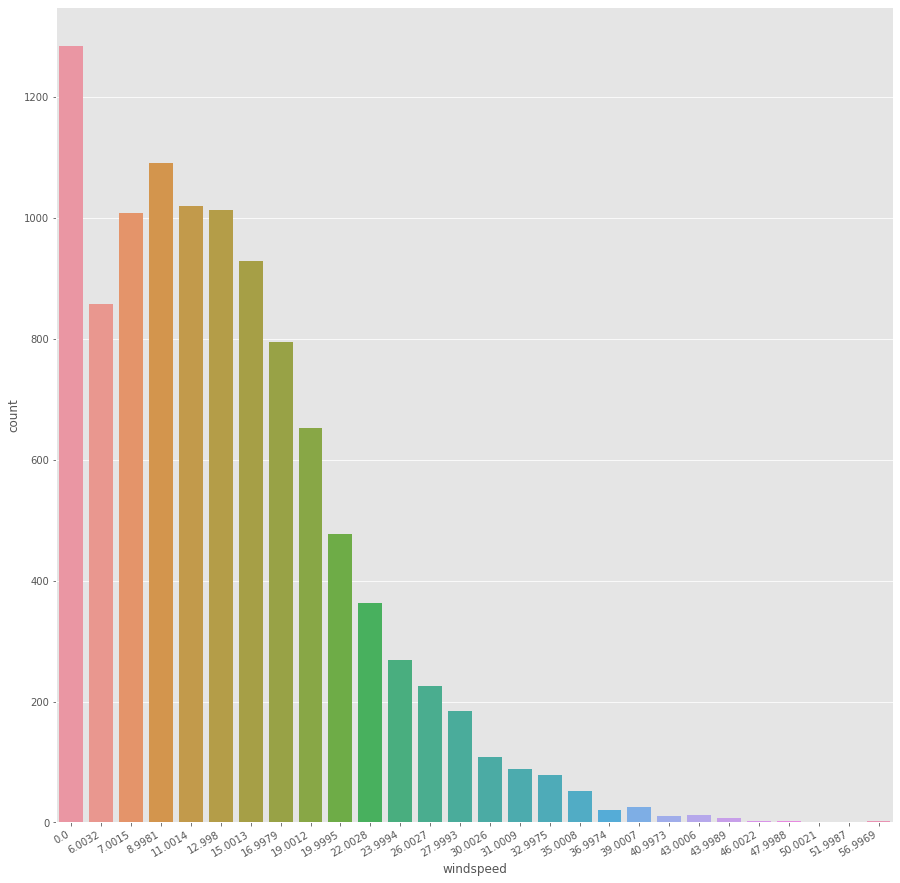

In [85]:
plt.figure(figsize = (15, 15))
plt.xticks(rotation = 30, ha = 'right')
sns.countplot(data = train, x = 'windspeed')

In [86]:
trainWind0 = train[train['windspeed'] == 0]; trainWind0

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10525,4,0,1,2,16.40,20.455,87,0.0,2012,12,9,0
10528,4,0,1,2,16.40,20.455,87,0.0,2012,12,12,0
10531,4,0,1,2,17.22,21.210,88,0.0,2012,12,15,0
10561,4,0,1,1,13.94,16.665,49,0.0,2012,12,22,1


In [87]:
trainWindNot0 = train[train['windspeed'] != 0]; trainWindNot0

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
5,1,0,0,2,9.84,12.880,75,6.0032,2011,1,5,5
10,1,0,0,1,15.58,19.695,76,16.9979,2011,1,10,5
11,1,0,0,1,14.76,16.665,81,19.0012,2011,1,11,5
12,1,0,0,1,17.22,21.210,77,19.0012,2011,1,12,5
13,1,0,0,2,18.86,22.725,72,19.9995,2011,1,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10581,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,2
10582,4,0,1,1,14.76,17.425,57,15.0013,2012,12,20,2
10583,4,0,1,1,13.94,15.910,61,15.0013,2012,12,21,2
10584,4,0,1,1,13.94,17.425,61,6.0032,2012,12,22,2


In [88]:
X = train.copy()
X[X['windspeed']==0]
X.loc[X['windspeed'] == 0, 'windspeed'] = trainWindNot0['windspeed'].mean()

In [89]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,14.541892,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,14.541892,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,14.541892,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,14.541892,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,14.541892,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10581,4,0,1,1,15.58,19.695,50,26.002700,2012,12,19,2
10582,4,0,1,1,14.76,17.425,57,15.001300,2012,12,20,2
10583,4,0,1,1,13.94,15.910,61,15.001300,2012,12,21,2
10584,4,0,1,1,13.94,17.425,61,6.003200,2012,12,22,2


In [93]:
trainWindNot0.corr()['windspeed']

season       -0.140208
holiday       0.014118
workingday    0.024542
weather      -0.013292
temp         -0.042953
atemp        -0.073297
humidity     -0.330703
windspeed     1.000000
year         -0.038701
month        -0.145009
hour          0.126009
dayofweek    -0.031660
Name: windspeed, dtype: float64

In [96]:
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
  dataWind0 = data[data['windspeed'] == 0]
  dataWindNot0 = data[data['windspeed'] != 0]

  wCol = ['season', 'weather', 'humidity', 'month', 'temp', 'year', 'atemp']

  dataWindNot0['windspeed'] = dataWindNot0['windspeed'].astype('str')

  rfModel_wind = RandomForestClassifier()
  rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0['windspeed'])

  wind0Values = rfModel_wind.predict(X = dataWind0[wCol])
  predictWind0 = dataWind0
  predictWindNot0 = dataWindNot0

  predictWind0['windspeed'] = wind0Values
  data = pd.concat([predictWind0, predictWindNot0])

  data['windspeed'] = data['windspeed'].astype('float')

  return data

In [98]:
X = predict_windspeed(train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)

In [101]:
from sklearn.linear_model import LinearRegression
lModel = LinearRegression()

In [102]:
lModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
pred = lModel.predict(X_train)

In [104]:
lModel.score(X_train, y_train)

0.024775931164639053

In [105]:
from sklearn.metrics import mean_squared_error
print('MSE :', mean_squared_error(y_train, pred))

MSE : 1.8916642272855815
